In [0]:
#import dependencies 
!pip install tensorflow==1.14.0
import keras

In [0]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

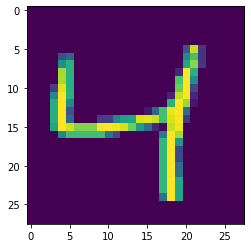

the above given number might be  4


In [3]:
#visualize the data
import matplotlib.pyplot as plt
#training image
plt.imshow(x_train[2])
plt.show()
#what the number is supposed to be
print("the above given number might be ", y_train[2])

In [0]:
#lets break the data down so that the neural network can digest it easier.

#reshape the data
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28, 28, 1)

#Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
#now we convert the y values (numbers) into ones and zeros, making each number categorical.
#This is called one-hot encoding.
#Without it, the neural network might categorize numbers based on how they are related numerically
#rather than how they look.

print(y_train[2])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[2])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
#now we will build the neural network. Each layer is a different type of neuron.

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
#train the network
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size= 128, epochs= 1, validation_data= (x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 162s 3ms/step - loss: 0.2613 - acc: 0.9202 - val_loss: 0.0555 - val_acc: 0.9821


In [8]:
#now we will test the model on test data and print the output.
#The first number is the loss and the second number is the accuracy out of 1.

print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 8s 796us/step
[0.05545868271715008, 0.9821]
